In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime 
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import networkx as nx
from pyvis.network import Network
import re

Using snscrape to scrape data of all tweets with the hashtag #Justice4Albert

In [2]:
tweet_count = 10000
text_query = "#JusticeForAlbert"
since_date = "2019-01-01"
until_date = "2022-02-25"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

**Question One**

In [3]:
tweets_df1 = pd.read_json('text-query-tweets.json', lines=True)
user_df = pd.json_normalize(tweets_df1['user'])
user_df = user_df.rename(columns = {'url': 'user_url'}, inplace = False)



#tweets_df2 = pd.concat([tweets_df1, tweets_df1['user'].apply(pd.Series)], axis=1)
tweets_df1.to_csv('C:/Users/Eli/Desktop/emll/tweets.csv', mode='a+', index = False)
user_df.to_csv('C:/Users/Eli/Desktop/emll/user.csv', mode='a+', index = False)


#tweets_df2 = pd.concat([tweets_df1, user_df], axis=1)

# Displays first 5 entries from dataframe
#tweets_df2.head()

**Dataframe of the tweets are put into a csv file**

**Question 2**

In [4]:
#user_df1 = user_df['username','displayname','verir']

tweets_df2 = pd.concat([tweets_df1, user_df[['username', 'displayname', 'verified', 'protected','user_url']]], axis=1)
#tweets_df2.to_csv('C:/Users/Eli/Desktop/emll/finaltweets.csv', mode='a+', index = False)
tweets_df2.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,username,displayname,verified,protected,user_url
0,snscrape.modules.twitter.Tweet,https://twitter.com/AlienatedMonke1/status/149...,2022-02-12 15:53:03+00:00,@robo1699 @GreatRatios #justiceforalbert,@robo1699 @GreatRatios #justiceforalbert,1492527179061682186,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[justiceforalbert],None,AlienatedMonke1,alienated BALLS (like if you get it),False,False,https://twitter.com/AlienatedMonke1
1,snscrape.modules.twitter.Tweet,https://twitter.com/hifmradio/status/148054678...,2022-01-10 14:27:14+00:00,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,1480546780903260166,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,None,None,[JUSTICEFORALBERT],None,hifmradio,Hi FM Oman,True,False,https://twitter.com/hifmradio
2,snscrape.modules.twitter.Tweet,https://twitter.com/loveghana213/status/147940...,2022-01-07 11:00:16+00:00,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,1479407534654042114,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,None,None,"[Rest, justiceforalbert]",None,loveghana213,Ama Ghana,False,False,https://twitter.com/loveghana213
3,snscrape.modules.twitter.Tweet,https://twitter.com/GhanaSocialU/status/147540...,2021-12-27 09:44:33+00:00,Let’s wake up! #JusticeForAlbert https://t.co...,Let’s wake up! #JusticeForAlbert https://t.co...,1475402209768714240,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,14,...,None,None,None,[JusticeForAlbert],None,GhanaSocialU,Believe in Jesus Christ 🙏🏾❤️,False,False,https://twitter.com/GhanaSocialU
4,snscrape.modules.twitter.Tweet,https://twitter.com/Nbayeboah/status/147431533...,2021-12-24 09:45:41+00:00,@AfrifaEmmaline So how far with the case? #jus...,@AfrifaEmmaline So how far with the case? #jus...,1474315330956804100,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[justiceforalbert],None,Nbayeboah,Son of Abraham,False,False,https://twitter.com/Nbayeboah


In [5]:
tweets_df2.count()

_type               2179
url                 2179
date                2179
content             2179
renderedContent     2179
id                  2179
user                2179
replyCount          2179
retweetCount        2179
likeCount           2179
quoteCount          2179
conversationId      2179
lang                2179
source              2179
sourceUrl           2179
sourceLabel         2179
outlinks             544
tcooutlinks          544
media                359
retweetedTweet         0
quotedTweet          358
inReplyToTweetId    1139
inReplyToUser       1139
mentionedUsers      1246
coordinates           20
place                 20
hashtags            2179
cashtags               1
username            2179
displayname         2179
verified            2179
protected           2179
user_url            2179
dtype: int64

a. The total number of tweets is 2156

In [6]:
tweets_df2['date']

0      2022-02-12 15:53:03+00:00
1      2022-01-10 14:27:14+00:00
2      2022-01-07 11:00:16+00:00
3      2021-12-27 09:44:33+00:00
4      2021-12-24 09:45:41+00:00
                  ...           
2174   2019-04-04 12:59:26+00:00
2175   2019-04-04 04:31:21+00:00
2176   2019-03-13 15:39:38+00:00
2177   2019-01-15 22:25:35+00:00
2178   2019-01-15 12:16:34+00:00
Name: date, Length: 2179, dtype: datetime64[ns, UTC]

In [7]:
tweets_df2['new_date'] = tweets_df2.date.apply(lambda x:dt.datetime.strftime(x, '%b %Y')).tolist()
tweets_df2['date_frequency'] = tweets_df2['new_date'].value_counts()
tweets_df2.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,place,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency
0,snscrape.modules.twitter.Tweet,https://twitter.com/AlienatedMonke1/status/149...,2022-02-12 15:53:03+00:00,@robo1699 @GreatRatios #justiceforalbert,@robo1699 @GreatRatios #justiceforalbert,1492527179061682186,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,[justiceforalbert],None,AlienatedMonke1,alienated BALLS (like if you get it),False,False,https://twitter.com/AlienatedMonke1,Feb 2022,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/hifmradio/status/148054678...,2022-01-10 14:27:14+00:00,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,1480546780903260166,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,[JUSTICEFORALBERT],None,hifmradio,Hi FM Oman,True,False,https://twitter.com/hifmradio,Jan 2022,NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/loveghana213/status/147940...,2022-01-07 11:00:16+00:00,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,1479407534654042114,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,"[Rest, justiceforalbert]",None,loveghana213,Ama Ghana,False,False,https://twitter.com/loveghana213,Jan 2022,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/GhanaSocialU/status/147540...,2021-12-27 09:44:33+00:00,Let’s wake up! #JusticeForAlbert https://t.co...,Let’s wake up! #JusticeForAlbert https://t.co...,1475402209768714240,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,14,...,None,[JusticeForAlbert],None,GhanaSocialU,Believe in Jesus Christ 🙏🏾❤️,False,False,https://twitter.com/GhanaSocialU,Dec 2021,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/Nbayeboah/status/147431533...,2021-12-24 09:45:41+00:00,@AfrifaEmmaline So how far with the case? #jus...,@AfrifaEmmaline So how far with the case? #jus...,1474315330956804100,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,[justiceforalbert],None,Nbayeboah,Son of Abraham,False,False,https://twitter.com/Nbayeboah,Dec 2021,NaN


b. Line graph showing time line of tweets

Text(0, 0.5, 'Dates')

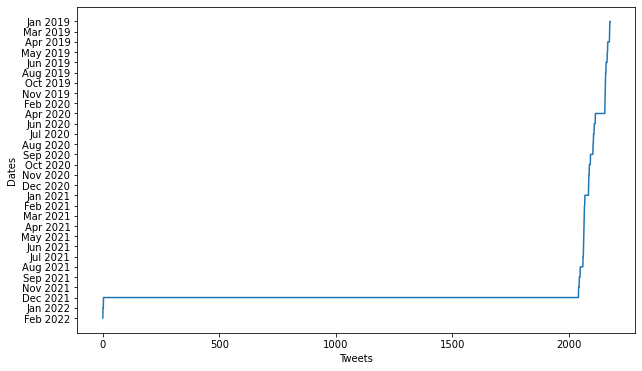

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
plt.plot(tweets_df2['new_date'])
plt.xlabel("Tweets")
plt.ylabel("Dates")

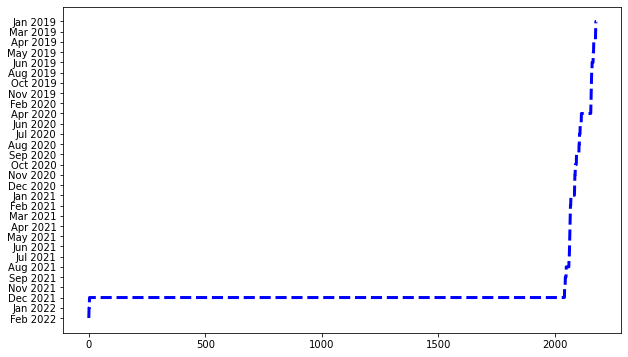

In [9]:
plt.plot(tweets_df2['new_date'], color = 'blue', linewidth=3, linestyle='dashed')

In [10]:
first_date = tweets_df2['date'].min()
first_date
tweets_df2.loc[tweets_df2['date'] == first_date]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,place,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency
2178,snscrape.modules.twitter.Tweet,https://twitter.com/JunkieSandspur/status/1085...,2019-01-15 12:16:34+00:00,@AlbertsStuff #JusticeForAlbert,@AlbertsStuff #JusticeForAlbert,1085148736341360641,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,[JusticeForAlbert],None,JunkieSandspur,+Truman The Ferret,False,False,https://twitter.com/JunkieSandspur,Jan 2019,NaN


c. Account name of the author of the first tweet that used the hashtag is BilalsCrown.
   Account handle is 𝔚𝔢𝔯𝔬𝔫𝔦𝔨𝔞~| 🖤

In [11]:
tweets_df2['highest_engagement'] = tweets_df2['retweetCount'] + tweets_df2['quoteCount']
tweets_df2.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency,highest_engagement
0,snscrape.modules.twitter.Tweet,https://twitter.com/AlienatedMonke1/status/149...,2022-02-12 15:53:03+00:00,@robo1699 @GreatRatios #justiceforalbert,@robo1699 @GreatRatios #justiceforalbert,1492527179061682186,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,[justiceforalbert],None,AlienatedMonke1,alienated BALLS (like if you get it),False,False,https://twitter.com/AlienatedMonke1,Feb 2022,NaN,0
1,snscrape.modules.twitter.Tweet,https://twitter.com/hifmradio/status/148054678...,2022-01-10 14:27:14+00:00,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,#JUSTICEFORALBERT https://t.co/8ftrHfnhJ0,1480546780903260166,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,[JUSTICEFORALBERT],None,hifmradio,Hi FM Oman,True,False,https://twitter.com/hifmradio,Jan 2022,NaN,0
2,snscrape.modules.twitter.Tweet,https://twitter.com/loveghana213/status/147940...,2022-01-07 11:00:16+00:00,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,Rest In Peace Tomtom💔🙏🤲\nForever remain in our...,1479407534654042114,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,"[Rest, justiceforalbert]",None,loveghana213,Ama Ghana,False,False,https://twitter.com/loveghana213,Jan 2022,NaN,0
3,snscrape.modules.twitter.Tweet,https://twitter.com/GhanaSocialU/status/147540...,2021-12-27 09:44:33+00:00,Let’s wake up! #JusticeForAlbert https://t.co...,Let’s wake up! #JusticeForAlbert https://t.co...,1475402209768714240,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,6,14,...,[JusticeForAlbert],None,GhanaSocialU,Believe in Jesus Christ 🙏🏾❤️,False,False,https://twitter.com/GhanaSocialU,Dec 2021,NaN,7
4,snscrape.modules.twitter.Tweet,https://twitter.com/Nbayeboah/status/147431533...,2021-12-24 09:45:41+00:00,@AfrifaEmmaline So how far with the case? #jus...,@AfrifaEmmaline So how far with the case? #jus...,1474315330956804100,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,[justiceforalbert],None,Nbayeboah,Son of Abraham,False,False,https://twitter.com/Nbayeboah,Dec 2021,NaN,0


**Tweet with highest engagement**

In [12]:
tweet_highest_engagement = tweets_df2['highest_engagement'].max()
tweet_highest_engagement_row = tweets_df2.loc[tweets_df2['highest_engagement'] == tweet_highest_engagement]
tweet_highest_engagement_row

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency,highest_engagement
723,snscrape.modules.twitter.Tweet,https://twitter.com/Efiaodo1/status/1471217945...,2021-12-15 20:37:46+00:00,#JusticeForAlbert \n#JusticeForAlbert \nRIP to...,#JusticeForAlbert \n#JusticeForAlbert \nRIP to...,1471217945498079234,"{'_type': 'snscrape.modules.twitter.User', 'us...",142,324,2489,...,"[JusticeForAlbert, JusticeForAlbert]",None,Efiaodo1,EFIAODO,True,False,https://twitter.com/Efiaodo1,Dec 2021,NaN,386


In [13]:
tweet_highest_engagement_row['content']

723    #JusticeForAlbert \n#JusticeForAlbert \nRIP to...
Name: content, dtype: object

In [14]:
tweet_highest_engagement_row['username']

723    Efiaodo1
Name: username, dtype: object

In [15]:
tweet_highest_engagement_row['url']

723    https://twitter.com/Efiaodo1/status/1471217945...
Name: url, dtype: object

In [16]:
tweet_highest_engagement_row['user_url']

723    https://twitter.com/Efiaodo1
Name: user_url, dtype: object

In [17]:
tweet_highest_engagement_row['url']

723    https://twitter.com/Efiaodo1/status/1471217945...
Name: url, dtype: object

**Tweets with highest number of retweets**

In [18]:
tweet_highest_retweet = tweets_df2.sort_values('retweetCount', ascending=False).head(15)
tweet_highest_retweet

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency,highest_engagement
723,snscrape.modules.twitter.Tweet,https://twitter.com/Efiaodo1/status/1471217945...,2021-12-15 20:37:46+00:00,#JusticeForAlbert \n#JusticeForAlbert \nRIP to...,#JusticeForAlbert \n#JusticeForAlbert \nRIP to...,1471217945498079234,"{'_type': 'snscrape.modules.twitter.User', 'us...",142,324,2489,...,"[JusticeForAlbert, JusticeForAlbert]",None,Efiaodo1,EFIAODO,True,False,https://twitter.com/Efiaodo1,Dec 2021,NaN,386
2042,snscrape.modules.twitter.Tweet,https://twitter.com/jashuawonder/status/147107...,2021-12-15 10:56:14+00:00,those injured or dying from this vaccine? Why ...,those injured or dying from this vaccine? Why ...,1471071595133349891,"{'_type': 'snscrape.modules.twitter.User', 'us...",39,274,559,...,[JusticeForAlbert],None,jashuawonder,Joshy Woshy™,False,False,https://twitter.com/jashuawonder,Dec 2021,NaN,318
1765,snscrape.modules.twitter.Tweet,https://twitter.com/KweiMensah2/status/1471101...,2021-12-15 12:55:30+00:00,This is heartbreaking 💔 Just 20yrs. Died after...,This is heartbreaking 💔 Just 20yrs. Died after...,1471101612072525828,"{'_type': 'snscrape.modules.twitter.User', 'us...",62,147,302,...,[JusticeForAlbert],None,KweiMensah2,Kwei Mensah,False,False,https://twitter.com/KweiMensah2,Dec 2021,NaN,195
2012,snscrape.modules.twitter.Tweet,https://twitter.com/KweiMensah2/status/1471088...,2021-12-15 12:04:58+00:00,@jashuawonder This madness of mandating vaccin...,@jashuawonder This madness of mandating vaccin...,1471088894330482691,"{'_type': 'snscrape.modules.twitter.User', 'us...",24,143,475,...,"[JusticeforAlbert, Sammygyamfi, Aguero]",None,KweiMensah2,Kwei Mensah,False,False,https://twitter.com/KweiMensah2,Dec 2021,NaN,147
1416,snscrape.modules.twitter.Tweet,https://twitter.com/AyewaMensah/status/1471143...,2021-12-15 15:40:57+00:00,Remember that crazy pain you felt when you too...,Remember that crazy pain you felt when you too...,1471143249905651723,"{'_type': 'snscrape.modules.twitter.User', 'us...",95,132,241,...,[JusticeForAlbert],None,AyewaMensah,Ayewah Mensah,False,False,https://twitter.com/AyewaMensah,Dec 2021,NaN,142
1556,snscrape.modules.twitter.Tweet,https://twitter.com/BongoIdeas/status/14711285...,2021-12-15 14:42:42+00:00,Saw #JusticeForAlbert and my heart skipped. \n...,Saw #JusticeForAlbert and my heart skipped. \n...,1471128587189301256,"{'_type': 'snscrape.modules.twitter.User', 'us...",47,128,501,...,[JusticeForAlbert],None,BongoIdeas,Albert Nat Hyde,False,False,https://twitter.com/BongoIdeas,Dec 2021,NaN,134
1292,snscrape.modules.twitter.Tweet,https://twitter.com/iamkingluther1/status/1471...,2021-12-15 16:07:12+00:00,Sake off University of Legon you are disregard...,Sake off University of Legon you are disregard...,1471149854793641992,"{'_type': 'snscrape.modules.twitter.User', 'us...",6,108,367,...,[JusticeForAlbert],None,iamkingluther1,iamkingluther,False,False,https://twitter.com/iamkingluther1,Dec 2021,NaN,109
2059,snscrape.modules.twitter.Tweet,https://twitter.com/fairyjadaa/status/14258396...,2021-08-12 15:20:47+00:00,My heart is hurting #justiceforAlbert \nYou ju...,My heart is hurting #justiceforAlbert \nYou ju...,1425839689299279873,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,104,189,...,"[justiceforAlbert, justiceforalbertcastillo]",None,fairyjadaa,duh,False,False,https://twitter.com/fairyjadaa,Aug 2021,NaN,104
1567,snscrape.modules.twitter.Tweet,https://twitter.com/lhip_tea/status/1471126599...,2021-12-15 14:34:48+00:00,Someone covered my eyes from my back and ask m...,Someone covered my eyes from my back and ask m...,1471126599315693570,"{'_type': 'snscrape.modules.twitter.User', 'us...",10,100,309,...,[JusticeForAlbert],None,lhip_tea,Gha/Barca month❤💙,False,False,https://twitter.com/lhip_tea,Dec 2021,NaN,103
1899,snscrape.modules.twitter.Tweet,https://twitter.com/pshegs/statu

**Account which tweeted "I thought it was a joke. But it’s really real?**

In [19]:
tweets_df2.loc[tweets_df2['content'] == "I thought it was a joke. But it’s really real? #JusticeForAlbert https://t.co/Q82VauAaoz"]

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,username,displayname,verified,protected,user_url,new_date,date_frequency,highest_engagement
1763,snscrape.modules.twitter.Tweet,https://twitter.com/MustaphaAbdulSw/status/147...,2021-12-15 12:55:50+00:00,I thought it was a joke. But it’s really real?...,I thought it was a joke. But it’s really real?...,1471101693123252235,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,66,138,...,[JusticeForAlbert],None,MustaphaAbdulSw,Mustapha Abdul,False,False,https://twitter.com/MustaphaAbdulSw,Dec 2021,NaN,69


In [20]:
#tweets_df3 = pd.read_csv('C:/Users/Eli/Desktop/emll/finaltweets.csv')
#tweets_df2['username_mask'] = pd.to_numeric(tweets_df2['id'])
#tweets_df3['username_Frequency'] = tweets_df3['username'].value_counts()
#tweet_highest_user = tweets_df2.sort_values('username_Frequency', ascending=False).head()
#tweets_df3.head()

**Accounts with highest number of original tweets**

In [21]:
user_freqdf = pd.DataFrame(tweets_df2['username'].value_counts())
user_freqdf['username1'] = user_freqdf.index
user_freqdf['username_frequency'] = user_freqdf['username']
user_freqdf.drop('username', axis='columns', inplace=True)
user_freqdf.rename(columns = {'username1': 'username'}, inplace = True)
user_freqdf.head(10)

,username,username_frequency
King20215880,King20215880,104
yourChristfan,yourChristfan,52
YESITOLDYOU,YESITOLDYOU,51
CSexier,CSexier,51
SothgKeys,SothgKeys,44
TheKingIsAwake,TheKingIsAwake,40
skabalita23,skabalita23,40
AkweiMr,AkweiMr,39
KweiMensah2,KweiMensah2,37
HubRevelation,HubRevelation,35


In [22]:
tweets_df2_usernamefreq = pd.concat([tweets_df2.set_index('username'), user_freqdf.set_index('username')], axis=1, join='inner')
tweets_df2_usernamefreq = tweets_df2_usernamefreq.sort_values('username_frequency', ascending=False).head(10)
tweets_df2_usernamefreq.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,displayname,verified,protected,user_url,new_date,date_frequency,highest_engagement,username_frequency
username,,,,,,,,,,,,,,,,,,,,,
King20215880,snscrape.modules.twitter.Tweet,https://twitter.com/King20215880/status/147115...,2021-12-15 16:38:56+00:00,@jashuawonder I'm Saddened by this \n#JusticeF...,@jashuawonder I'm Saddened by this \n#JusticeF...,1471157841146912773,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,3,...,[JusticeForAlbert],None,King🇬🇭🇬🇭,False,False,https://twitter.com/King20215880,Dec 2021,NaN,3,104
King20215880,snscrape.modules.twitter.Tweet,https://twitter.com/King20215880/status/147116...,2021-12-15 17:08:04+00:00,@NoLoveGen You would say this if he was a brot...,@NoLoveGen You would say this if he was a brot...,1471165169854300167,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,[JusticeForAlbert],None,King🇬🇭🇬🇭,False,False,https://twitter.com/King20215880,Dec 2021,NaN,0,104
King20215880,snscrape.modules.twitter.Tweet,https://twitter.com/King20215880/status/147115...,2021-12-15 16:15:06+00:00,@AyewaMensah President Pro-Vaxx. Vaccine mu Mo...,@AyewaMensah President Pro-Vaxx. Vaccine mu Mo...,1471151843069906950,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,[JusticeForAlbert],None,King🇬🇭🇬🇭,False,False,https://twitter.com/King20215880,Dec 2021,NaN,1,104
King20215880,snscrape.modules.twitter.Tweet,https://twitter.com/King20215880/status/147115...,2021-12-15 16:17:03+00:00,@SammyGyamfi2017 Bra Sammy Arrant Nonsense Amp...,@SammyGyamfi2017 Bra Sammy Arrant Nonsense Amp...,1471152330892587010,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,0,...,[JusticeForAlbert],None,King🇬🇭🇬🇭,False,False,https://twitter.com/King20215880,Dec 2021,NaN,1,104
King20215880,snscrape.modules.twitter.Tweet,https://twitter.com/King20215880/status/147115...,2021-12-15 16:21:45+00:00,@PhilipAbban4 @SammyGyamfi2017 Masa shift. A c...,@PhilipAbban4 @SammyGyamfi2017 Masa shift. A c...,1471153515716300803,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,3,...,[JusticeForAlbert],None,King🇬🇭🇬🇭,False,False,https://twitter.com/King20215880,Dec 2021,NaN,2,104


**Cleaning tweets for Word Cloud**

In [23]:
content_df = tweets_df2.content
print(content_df.shape)

(2179,)


In [24]:
content_df.str.lower()
content_df.head()

0             @robo1699 @GreatRatios #justiceforalbert
1            #JUSTICEFORALBERT https://t.co/8ftrHfnhJ0
2    Rest In Peace Tomtom💔🙏🤲\nForever remain in our...
3    Let’s wake up! #JusticeForAlbert  https://t.co...
4    @AfrifaEmmaline So how far with the case? #jus...
Name: content, dtype: object

In [25]:
content_df = content_df.str.split(' ')
content_df.head()

0         [@robo1699, @GreatRatios, #justiceforalbert]
1         [#JUSTICEFORALBERT, https://t.co/8ftrHfnhJ0]
2    [Rest, In, Peace, Tomtom💔🙏🤲\nForever, remain, ...
3    [Let’s, wake, up!, #JusticeForAlbert, , https:...
4    [@AfrifaEmmaline, So, how, far, with, the, cas...
Name: content, dtype: object

In [26]:
import string
all_tweets_cleaned = []

for text in content_df:
    #text = [x.strip(string.punctuation) for x in text]
    all_tweets_cleaned.append(text)

all_tweets_cleaned[0]

text_tweet = [" ".join(text) for text in all_tweets_cleaned]
final_text_tweet = " ".join(text_tweet)
final_text_tweet

'@robo1699 @GreatRatios #justiceforalbert #JUSTICEFORALBERT https://t.co/8ftrHfnhJ0 Rest In Peace Tomtom💔🙏🤲\nForever remain in our hearts 😪\nTill we meet again 😓💔#Rest In Peace #justiceforalbert https://t.co/RwE2Jgw8mi Let’s wake up! #JusticeForAlbert  https://t.co/52z5wSPjgD @AfrifaEmmaline So how far with the case? #justiceforalbert 💔❤️. Justice  #JusticeForAlbert https://t.co/PFs5ol8UZl Just a question.  #JusticeForAlbert #WakeUp #VaccineDeaths https://t.co/o4aznUFuZw #JusticeForAlbert https://t.co/8QYkheCjMu 16/12/21\n\nAlbert Owusu Sarpong, studente universitario di 20 anni, muore due giorni dopo il vaccino. La denuncia del suo compagno di stanza. Spopola l’hashtag #JusticeForAlbert.\nhttps://t.co/SAQZH9tDBv It was sad seeing your posters all around in town😪.I never had the chance to speak to you but to see a human like you go down so early is sad. You don\'t and didn\'t deserve such death. May your soul Rest In Peace😥.\n#JusticeForAlbert https://t.co/NRYBnX4eWE If a person ghosts

In [27]:
Tweet_Texts_Cleaned = final_text_tweet.lower()
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,4}\b', '', Tweet_Texts_Cleaned)
#Tweet_Texts_Cleaned= re.sub(r'\b\w{1,6}\b', '', Tweet_Texts_Cleaned)
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)
#Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2,3}\b', '', Tweet_Texts_Cleaned)
#Tweet_Texts_Cleaned = [x for x in Tweet_Texts_Cleaned if len(x) > 4]
Tweet_Texts_Cleaned

' justiceforalbert justiceforalbert peace tomtom forever remain hearts again peace justiceforalbert justiceforalbert justiceforalbert justice justiceforalbert question justiceforalbert wakeup vaccinedeaths justiceforalbert albert owusu sarpong studente universitario muore giorni vaccino denuncia compagno stanza spopola hashtag justiceforalbert seeing posters around never chance speak human early deserve death peace justiceforalbert person ghosts honour justiceforalbert grave ghost waste anger there certain people there shines still total darkness matter beyond carnal understanding saynotomandatoryvaccination justiceforalbert pharaoh justiceforalbert through himself party dispite covid concerns molly savage omicronvarient covid justiceforalbert alcohol should declared pandemic mandatory directives infringe people right purge force drinking alcohol protect those drink alcohol saynotomandatoryvaccination justiceforalbert justiceforalbert documentary covid spraying scandal initiated presid

In [28]:
from collections import Counter


split_it = Tweet_Texts_Cleaned.split()
split_it


resulting_count = Counter(split_it)
# Pass the split_it list to instance of Counter class.
#Counters_found = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = resulting_count.most_common(11)

most_occur

[('justiceforalbert', 2445),
 ('vaccine', 516),
 ('people', 331),
 ('vaccines', 171),
 ('after', 169),
 ('covid', 166),
 ('albert', 154),
 ('aguero', 150),
 ('taking', 133),
 ('ghanaians', 132),
 ('should', 130)]

In [29]:
most_occur = str(most_occur )
most_occur

"[('justiceforalbert', 2445), ('vaccine', 516), ('people', 331), ('vaccines', 171), ('after', 169), ('covid', 166), ('albert', 154), ('aguero', 150), ('taking', 133), ('ghanaians', 132), ('should', 130)]"

In [30]:
import matplotlib.pyplot as plt
 
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + ["justiceforalbert'", "sammygyamfi'"]
 
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(most_occur)


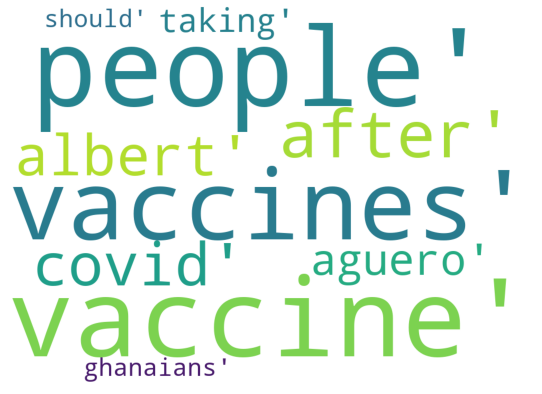

In [31]:
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

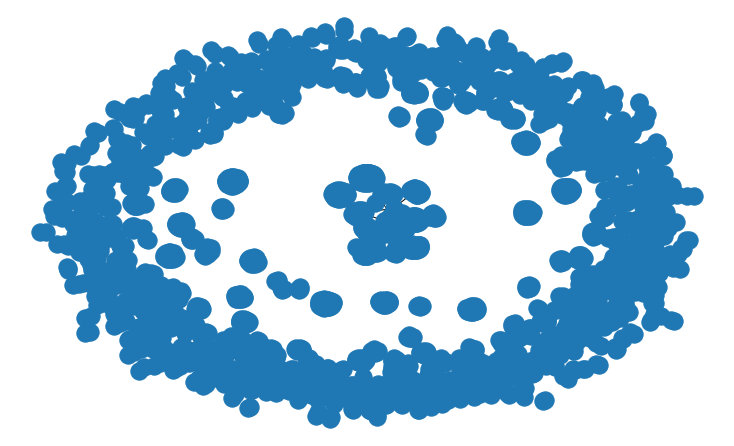

In [32]:
G = nx.from_pandas_edgelist(tweets_df2, source='username', target = 'content', edge_attr='content')
nx.draw(G)